In [2]:
%run preamble.py
%matplotlib inline

# the Normal Equations

Given $(-3.1,4.2)$, $(-2.1,2.4)$, $(1.8,-2.5)$, $(0.5,-1.3)$, $(-1.1,1.9)$, we seek $\beta = (\beta_0,\beta_1)$ so that for

$$
\left(\begin{matrix}1&-3.1\\1&-2.1\\1&1.8\\1&0.5\\1&-1.1\end{matrix}\right)
\left(\begin{matrix}\beta_0\\\beta_1\end{matrix}\right)\approx\left(\begin{matrix}4.2\\2.4\\-2.5\\-1.3\\1.9\end{matrix}\right)$$

$$X\beta\approx\mathbf{y}$$

and with error 

$$ \varepsilon = X\beta  - \mathbf{y} $$

the loss function 

$$\mathcal{L}(\beta) = \varepsilon^T \varepsilon$$

is at a minimum.

### How do we find a minimum?

Calculus and Linear Algebra!!


##### Special Transpose Property
We are going to need this fact: The transpose has a special property so that

$$(UV)^T = V^TU^T$$

##### Minimizing the Loss Function

\begin{align}
\mathcal{L}(\beta) &= \varepsilon^T \varepsilon\\
&=(X\beta - \mathbf{y})^T(X\beta - \mathbf{y})\\
\end{align}


##### Expansion 
Let's expand this using FOIL.
\begin{align}
\mathcal{L}(\beta) &=(X\beta)^TX\beta - \mathbf{y}^TX\beta  - (X\beta)^T\mathbf{y} + \mathbf{y}^T\mathbf{y}
\end{align}

##### Application of Transpose Property
We apply the special property of the transpose to the first term
\begin{align}
\mathcal{L}(\beta) &=\beta^TX^T X\beta - \mathbf{y}^TX\beta  - (X\beta)^T\mathbf{y} + \mathbf{y}^T\mathbf{y}
\end{align}

##### Combine middle terms using Properties of Dot Product

Recall that the dot product is order **independent**. Therefore 

$$ \mathbf{y}^TX\beta  = (X\beta)^T\mathbf{y}$$

Therefore, we can combine the middle terms which gives us

\begin{align}
\mathcal{L}(\beta) &=\beta^TX^T X\beta - 2(X\beta)^T\mathbf{y} + \mathbf{y}^T\mathbf{y}
\end{align}


##### Application of the Transpose Property

We next apply the transpose property again

\begin{align}
\mathcal{L}(\beta) &=\beta^TX^T X\beta - 2\beta^TX^T\mathbf{y} + \mathbf{y}^T\mathbf{y}
\end{align}

##### Minimize by Taking the Derivative
To find the minimum of the loss function for a vector $\beta$, we take the derivative with respect to $\beta$.

\begin{align}
\frac{d}{d\beta}\mathcal{L}(\beta) &= \frac{d}{d\beta}\left(\beta^TX^T X\beta - 2\beta^TX^T\mathbf{y} + \mathbf{y}^T\mathbf{y}\right)
\end{align}

And set it equal to zero.

$$\frac{d}{dx}x^b=bx^{b-1}$$

$$\frac{d}{dx}x^2 = \frac{d}{dx}x\cdot x = 2x$$

$$\frac{d}{dx}3x = 3$$

$$\frac{d}{dx}5 = 0$$

\begin{align}
\frac{d}{d\beta}\mathcal{L}(\beta) &= 2X^T X\beta - 2X^T\mathbf{y} = 0\\
\end{align}

This leaves us with 

$$ X^T X\beta = X^T\mathbf{y}$$

In [5]:
G = np.random.rand(10).reshape((5,2))
G

array([[ 0.20089435,  0.31689871],
       [ 0.49478261,  0.70858838],
       [ 0.86323741,  0.64770039],
       [ 0.16050815,  0.08982981],
       [ 0.71581243,  0.75107903]])

In [4]:
G.T.dot(G) 

array([[ 0.21924791,  0.58957734],
       [ 0.58957734,  1.95416549]])

### Recall the Original Data

$$
\left(\begin{matrix}1&-3.1\\1&-2.1\\1&1.8\\1&0.5\\1&-1.1\end{matrix}\right)
\left(\begin{matrix}\beta_0\\\beta_1\end{matrix}\right)=\left(\begin{matrix}4.2\\2.4\\-2.5\\-1.3\\1.9\end{matrix}\right)$$

this result shows that we have a minimum loss when 

$$X^TX\beta=X^T\mathbf{y}$$

which we can easily solve by 

$$\beta=(X^TX)^{-1}X^T\mathbf{y}$$

## Normal Equations in Matrix Form

This equation is known as the matrix form of the [normal equations](normeq)

$$\beta=(X^TX)^{-1}X^T\mathbf{y}$$


[normeq]: https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)#Inverting_the_matrix_of_the_normal_equations

In [12]:
X = np.array([(1,-3.1),(1,-2.1),(1,1.8),(1,0.5),(1,-1.1)])
y = np.array((4.2,2.4,-2.5,-1.3,1.9))
beta = inverse(X.T.dot(X)).dot(X.T).dot(y)
beta

array([-0.17030928, -1.3878866 ])

In [21]:
#alternative
XTX = X.T.dot(X)
XTy = X.T.dot(y)

np.linalg.solve(XTX,XTy)

array([-0.17030928, -1.3878866 ])

In [9]:
beta.T.dot(X.T).dot(X)

array([  4.7, -25.3])

In [10]:
X.T.dot(X).dot(beta)

array([  4.7, -25.3])

### Check our Answer

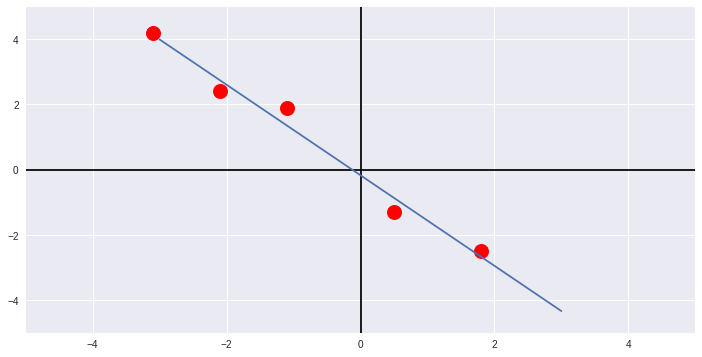

In [11]:
fig = initialize_2d_plot(-5,5,-5,5)
plt.plot(-3.1,4.2,'o',c='red', markersize=15)
plt.plot(-2.1,2.4,'o',c='red', markersize=15)
plt.plot(1.8,-2.5,'o',c='red', markersize=15)
plt.plot(0.5,-1.3,'o',c='red', markersize=15)
plt.plot(-1.1,1.9,'o',c='red', markersize=15)
f = lambda x: beta[0] + beta[1]*x
plt.plot(xx, f(xx))

## "Best" Fit

It can be shown by the [Gauss-Markov theorem](https://en.wikipedia.org/wiki/Gauss–Markov_theorem) that the $\beta$ vector we found defines the "best" fit, that is it defines the line with the Best Linear Unbiased Estimator.

<img src="https://s-media-cache-ak0.pinimg.com/originals/98/97/80/9897808ebe39a3098b9c3f26e9bbda1d.jpg"
     width="400px"
     style="display: block; margin: 0 auto">